# Analyzing Structured Data

In this practical, you'll learn how to analyze structured data using data science methodology starting from problem formulation to storytelling with data.

# Objectives

At the end of this practical, you will be able to:
* Efficiently formulate data science problems using design thinking approach
* Load data using Python and join multiple tables
* Perform univariate and bivariate Exploratory Data Analysis (EDA)
* Use cluestering algorithm such as K-Means
* Perform structured data analytics using data aggregation
* Convey insights from data using visualisations

<h1>Table of Contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="#1.-Problem-Formulation">Problem Formulation</a></li>
    <li><a href="#2.-Data-Collection">Data Collection</a></li>
    <li><a href="#3.-Data-Preparation">Data Preparation</a></li>
    <li><a href="#4.-Data-Analysis">Data Analysis</a></li>
    <li><a href="#5.-Storytelling-with-Data">Storytelling with Data</a></li>    
    
</ol>

</div>



# Data Science Process

![Data Science Process Infographic](data_science_process_image.png)
<br>
<i><center><font size=2> Figure 1. Data Science Process Infographic </font></center></i>

In this notebook, you'll follow the above data science process to analyze structured data.

|Exercise|
|:---:|
|What is structured data? Give an example of structured data.|


In [1]:
# write your answer here


# 1. Problem Formulation

With the help of data science methodology, we can derive useful insights from data. But what if these insights are not useful or relevant to our users and we could not fulfill their requirements. In other words, we should understand our users' expectations and needs for data analysis. So the first step of data science methodology is formulating the problem as accurately as possible.

Design thinking can help us in formulating data science problems. The core principle of design thinking is to treat humans (users) at the center of any product design process. In data science, humans are main beneficiaries of data derived insights. In design thinking, you ask certain questions to understand users and their reqirements for any data science project. For the practical, we’ll consider following scenario.

**Scenario**

Consider a large organization which has many divisions such as Sales & Marketing, Analytics, HR, Finance, etc. Across the divisions, the company promotes relevant employees to a higher role based on their performance. Company HR might be interested in knowing promotion trends among the company such as overall promotion rate, gender wise promotion, department wise promotion, etc. This can help company in improving promotion policy.

Consider yourself working as a data scientist for the project. Now answer the following questions:

|Exercise|
|:---:|
|1. Why is this analysis carried out?|
|2. Who are my stakeholders?|
|3. What value does this analysis bring to stakeholders?|

# 2. Data Collection

Once the problem is defined, next step is to collect data for analysis. Here we'll use employee promotion dataset from Kaggle. Though the dataset has been modified for this practical, you can access original dataset from <a href="https://www.kaggle.com/arashnic/hr-ana">here</a>.

In this prac, the data collection process is simplified by providing data. However, in reality this process can be messy and complex. 

## 2.1 Load data

The dataset has two tables.
* employee_personal_information.csv
* employee_work_information.csv

Let's load the data using Pandas as dataframe. Dataframes are 2D data structure that resembles to a table with rows and columns. Dataframes allow to perform useful data manipulation and analysis operations.

### 2.1.1 Load employee_personal_information.csv

In [1]:
# import pandas library using alias pd
import pandas as pd
#pd.set_option('precision', 2)

# load the data
personal_information = pd.read_csv(filepath_or_buffer='employee_personal_information.csv')

# view first few rows of the data
personal_information.head(5)

,employee_id,region,education,gender,age
0,E21133,region_13,Master's & above,m,36
1,E39322,region_31,Bachelor's,m,37
2,E26399,region_7,Bachelor's,m,30
3,E18243,region_2,Bachelor's,m,43
4,E35678,region_26,Master's & above,m,45


**Column Descriptions**

1. **employee_id** : Unique identifier of each employee
2. **region** :  Regions of employment (anonymized)
3. **education** : Employee's highest education level (possible values - `Below Secondary`, `Bachelor's`, `Master's & above` and missing values)  
4. **gender** : Employee's gender (can take two values - `M`(male) and `F`(female))
5. **age** : Employee's age in years

### 2.1.2 Load employee_work_information.csv

In [2]:
# load the data
work_information = pd.read_csv(filepath_or_buffer='employee_work_information.csv')

# view first few rows of the data
work_information.head(5)

,employee_id,department,recruitment_channel,no_of_trainings,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,E21133,Procurement,other,1,1.0,5,0,73,0
1,E39322,Sales & Marketing,sourcing,2,2.0,2,0,48,0
2,E26399,Technology,other,3,4.0,3,0,75,0
3,E18243,Operations,other,1,5.0,5,0,58,0
4,E35678,Procurement,sourcing,2,3.0,19,0,68,0


**Column Descriptions**

1. **employee_id** : Unique identifier of each employee
2. **department** :  Department of employee
3. **recruitment_channel** : Channel of recruitment of employee
4. **no_of_trainings** : Number of trainings employee completed in the previous year such as software training, short courses, etc.
5. **previous_year_rating** : Employee's performance rating for the previous year (min possible value is 1 and max possible value is 5)
6. **length_of_service** : Number of years the employee has spent working with the organization
7. **awards_won?** : Binary variable showing whether the employee won any award(s) in the previous year. It can take two values - 0 and 1. Here 1 indicates the employee won award(s) in the previous year and  0 indicates otherwise.
8. **avg_training_score** : Average score in current training evaluations (min possible value is 0 and max possible value is 100)
9. **is_promoted** : Binary variable showing whether or not employee got promoted in last year. It can take two values - 0 and 1. Here 1 means employee is promoted and 0 means otherwise.

## 2.2 Data Integration

Sometimes the data we need for analysis is scattered across multiple tables. We can join these tables based on a common column to enrich the data. In our dataset, the common column is `employee_id`. Let's join the table based on `employee_id` and name the joined table as `employee_data`.

In [3]:
# perform inner join between personal_information and work_information tables
employee_data = pd.merge(left=personal_information, right=work_information,
                        how='inner', on='employee_id')

# print first few rows of joined table
employee_data.head()

,employee_id,region,education,gender,age,department,recruitment_channel,no_of_trainings,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,E21133,region_13,Master's & above,m,36,Procurement,other,1,1.0,5,0,73,0
1,E39322,region_31,Bachelor's,m,37,Sales & Marketing,sourcing,2,2.0,2,0,48,0
2,E26399,region_7,Bachelor's,m,30,Technology,other,3,4.0,3,0,75,0
3,E18243,region_2,Bachelor's,m,43,Operations,other,1,5.0,5,0,58,0
4,E35678,region_26,Master's & above,m,45,Procurement,sourcing,2,3.0,19,0,68,0


If you observe the arguements in the function `pd.merge()`, there are four arguments. Here `left` and `right` indicate the tables that will be left or right in the join. The arguement `how` indicate the type of join. For this dataset, we used `inner` join. It means only intersecting `employee_id` from both the tables will be preserved in the joined table.

#### Read more about joining in Pandas

* <a href="https://ebookcentral-proquest-com.ezproxy.library.uq.edu.au/lib/uql/reader.action?docID=4746657&ppg=164">UQ Library - Python Data Science Handbook : Essential Tools for Working with Data</a>
* <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html">Pandas Article - Merge, join, concatenate and compare</a>
* <a href="https://medium.com/swlh/merging-dataframes-with-pandas-pd-merge-7764c7e2d46d">Medium Article - Merging DataFrames with pandas</a>

# 3. Data Preparation

The collected data can be messy and full of data quality issues. The data needs to be examined thoroughly and cleaned before performing analysis. In this step, you'll learn to perform Exploratory Data Analysis (EDA), Data Enrichment, Clustering, and Data Reshaping techniques.


## 3.1 Exploratory Data Analysis (EDA)

In Exploratory Data Analysis or EDA, you'll explore data to understand its main characteristics using descriptive statistics and data visualisation. During EDA, you'll come across some data quality issues and learn to fix them.

### 3.1.1 Shape and Info of columns

In [4]:
# shape of data
employee_data.shape

(54838, 13)

It can be observed that the dataset has 54388 rows and 13 columns.

In [5]:
# concise summary of the dataset
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54838 entries, 0 to 54837
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54838 non-null  object 
 1   region                54838 non-null  object 
 2   education             52426 non-null  object 
 3   gender                54838 non-null  object 
 4   age                   54838 non-null  int64  
 5   department            54838 non-null  object 
 6   recruitment_channel   54838 non-null  object 
 7   no_of_trainings       54838 non-null  int64  
 8   previous_year_rating  50712 non-null  float64
 9   length_of_service     54838 non-null  int64  
 10  awards_won?           54838 non-null  int64  
 11  avg_training_score    54838 non-null  int64  
 12  is_promoted           54838 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 5.9+ MB


|Exercise|
|:---:|
|The above summary shows number of non-missing values and data-type of each column. What are your observations?|


In [114]:
# write your answer here



**Identify number of missing values**

In [6]:
employee_data.isna().sum()

employee_id                0
region                     0
education               2412
gender                     0
age                        0
department                 0
recruitment_channel        0
no_of_trainings            0
previous_year_rating    4126
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

Currently, the data has missing values in `education` and `previous_year_rating` columns. The missing data can be handled in the following ways:
* Remove rows containing missing data (not usually recommended as it leads to loss of data)
* Find the replacement values for the missing values from the original source of data (recommended)
* Impute the missing data using the best estimate of the missing values based on non-missing values (recommended) 

After finishing EDA, you'll learn to perform imputation of missing values.

### 3.1.2 Univariate EDA

In univariate EDA, you'll explore each column in isolation to identify its distribution and/or data quality issues.

### Column 'employee_id'

In [7]:
# summarize employee_id
employee_data["employee_id"].describe()

count      54838
unique     54808
top       E55200
freq           4
Name: employee_id, dtype: object

**Unique count of employee_id and total count is not same. It indicates potential duplicates in the data.**

In [8]:
# count number of duplicates in the data
employee_data.duplicated().sum()

30

It can be observed that the data contains total 30 duplicate rows. You can keep one orginial copy and discard the other copies. To de-duplicate the data, you can use `.drop_duplicates(keep='first)` method on dataframe. Here `keep='first'` will retain first occurrence as original and discard others. You can change `keep` to `last` to mark last occurrence as original and discard others. Read more about it <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html"> here</a>.

In [9]:
# remove duplicates
employee_data = employee_data.drop_duplicates(keep='first')

# verify that duplicates have been removed by counting duplicates
employee_data.duplicated(keep=False).sum()

0

### Column 'region'

In [10]:
# summarize region
employee_data["region"].describe()

count        54808
unique          34
top       region_2
freq         12343
Name: region, dtype: object

In [11]:
# view unique values
employee_data["region"].unique()

array(['region_13', 'region_31', 'region_7', 'region_2', 'region_26',
       'region_23', 'region_15', 'region_27', 'region_11', 'region_12',
       'region_16', 'region_22', 'region_20', 'region_28', 'region_34',
       'region_17', 'region_1', 'region_14', 'region_3', 'region_30',
       'region_10', 'region_4', 'region_32', 'region_6', 'region_25',
       'region_9', 'region_19', 'region_8', 'region_29', 'region_5',
       'region_21', 'region_24', 'region_33', 'region_18'], dtype=object)

In [12]:
# distribution of the 'region' column
# nalrgest(10) prints top 10 values in desceding order of their frequency
region_distribution = employee_data["region"].value_counts().nlargest(10)
region_distribution

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
Name: region, dtype: int64

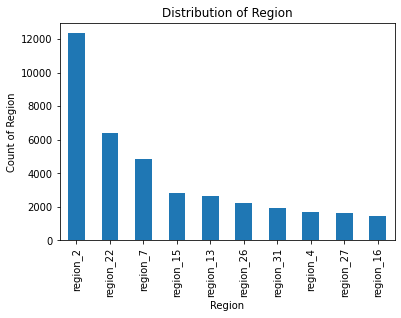

In [13]:
# plot distribution of the 'region' column
region_distribution.plot.bar(xlabel="Region", ylabel="Count of Region", grid=False, title="Distribution of Region");

It can be observed that `region_2` has highest number of employees, followed by `region_22`.

### Column 'education'

In [14]:
# view unique values
employee_data['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Undergraduate',
       'Postgraduate & higher', 'Masters', 'Below Secondary', 'Bachelors'],
      dtype=object)

**Referring to the description of the column `education`, it seems there is inconsistency in column values along with missing values 'nan'. Let's fix the inconsistency.**

In [15]:
# define replacement dictionary
education_replacement = {'Bachelors':"Bachelor's", 
                         'Undergraduate':"Bachelor's",
                         'Postgraduate & higher':"Master's & above", 
                         'Masters':"Master's & above"}

# perform replacement
employee_data["education"] = employee_data["education"].replace(education_replacement)

# verify that gender values are now consistent
employee_data["education"].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

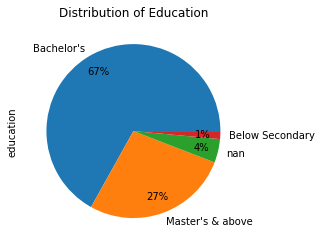

In [16]:
# distribution of the 'education' column values
education_distribution = employee_data["education"].value_counts(dropna=False, normalize=True)

# make a pie chart
education_distribution.plot.pie(autopct='%1.0f%%', pctdistance=0.8, radius=1, title="Distribution of Education");

It can be observed that majority of employees have Bachelor's degree and 4% of employees' education information is missing.

### Column 'gender'

In [17]:
# view unique values
employee_data['gender'].unique()

array(['m', 'f', 'M', 'male', 'Female', 'female', 'Male', 'F'],
      dtype=object)

|Exercise|
|:---:|
|It can be observed that `gender` column has inconsistencies in values. You need to fix those values and then analyze using appropriate chart. Hint : Refer to the 'gender' column description to know valid values.|


In [128]:
# fix gender inconsistencies



In [129]:
# analyze gender column




### Column 'age'

In [18]:
# summarize age
employee_data['age'].describe()

count    54808.000000
mean        34.889870
std         10.018824
min         20.000000
25%         29.000000
50%         33.000000
75%         39.000000
max        621.000000
Name: age, dtype: float64

#### The max value of `age` is 621! Let's explore it further.

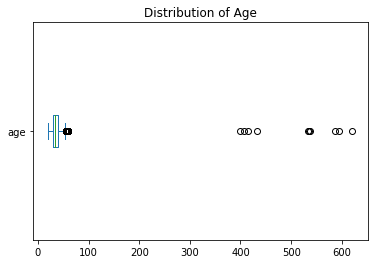

In [19]:
# boxplot of age
employee_data["age"].plot.box(vert=False, title="Distribution of Age");

Lots of outliers can be observed. You can either remove the rows with outlier or mark them as missing, which can later be imputed. Here, we'll mark age above 100 as missing.

In [20]:
# identify out of bound values in age
# following will return true for out of bound values and false otherwise
boolean_mask = employee_data["age"] > 100

# count out of bound values
boolean_mask.sum()

10

In [21]:
# import numpy with alias np
import numpy as np

# mark out of bounds as missing values (np.nan)
employee_data.loc[boolean_mask, "age"] = np.nan

# verify that out of bounds are now removed 
employee_data["age"].describe()

count    54798.000000
mean        34.803880
std          7.660358
min         20.000000
25%         29.000000
50%         33.000000
75%         39.000000
max         60.000000
Name: age, dtype: float64

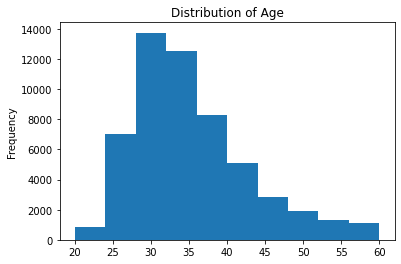

In [22]:
# histogram of age
employee_data["age"].plot.hist(grid=False, bins=10, title="Distribution of Age");

It can be observed that majority of the employees are aged between 27 to 35 years.

### Column 'department'

In [23]:
# summarize department column
employee_data["department"].describe()

count                 54808
unique                    9
top       Sales & Marketing
freq                  16840
Name: department, dtype: object

In [24]:
# view unique department values
employee_data["department"].unique()

array(['Procurement', 'Sales & Marketing', 'Technology', 'Operations',
       'Finance', 'Analytics', 'Legal', 'R&D', 'HR'], dtype=object)

Defaulting to user installation because normal site-packages is not writeable
--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/rich/console.py", line 1752, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/rich/console.py", line 1390, in render
    for render_output in iter_render:
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/rich/segment.py", line 245, in split_lines
    for segment in segments:
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/rich/console.py", line 1368, in render
    renderable = rich_cast(renderable)
  File 

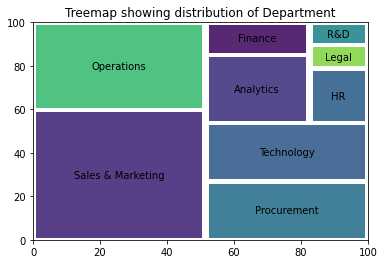

In [26]:
# distribution of the 'department' column
department_distribution = employee_data["department"].value_counts()

# uncomment following line if you get error 'module not found'
# !pip install squarify

import squarify 
from matplotlib import pyplot as plt

# plot treemap of the 'department' column 
ax=squarify.plot(sizes=department_distribution, label=department_distribution.index, alpha=0.9, pad=True)
plt.title("Treemap showing distribution of Department");

Treemaps are useful for part-to-whole comaprisons. The size of the rectangle indicates distribution of the value in the column. It can be seen that majority of the employees belong to `Sales and Marketing` department, followed by `Operations`.

### Column 'previous_year_rating'

In [27]:
# summarize previous_year_rating column
employee_data["previous_year_rating"].describe()

count    50685.000000
mean         3.330453
std          1.261849
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          9.000000
Name: previous_year_rating, dtype: float64

#### Max rating is 9, which is out of the bound as maximum possible rating is 5.

In [28]:
# view unique previous_year_rating values
employee_data["previous_year_rating"].unique()

array([ 1.,  2.,  4.,  5.,  3., nan,  9.,  7.,  8.,  6.])

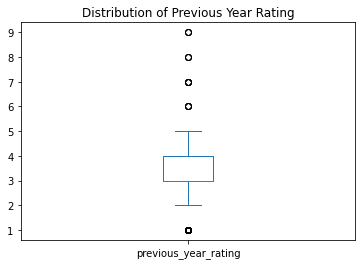

In [29]:
# box plot of previous_year_rating
employee_data["previous_year_rating"].plot.box(title="Distribution of Previous Year Rating");

|Exercise|
|:---:|
|Fix the invalid outlier (out of bound) values and then analyze using appropriate chart(s). Hint : Refer to the 'previous_year_rating' column description to know valid values.|


In [150]:
# fix out of bound values in previous_year_rating



In [151]:
# analyze previous_year_rating column




<font size=3><b>Column 'avg_training_score'</b></font>

In [30]:
# summarize avg_training_score column
employee_data["avg_training_score"].describe()

count    54808.000000
mean        63.386750
std         13.371559
min         39.000000
25%         51.000000
50%         60.000000
75%         76.000000
max         99.000000
Name: avg_training_score, dtype: float64

In [31]:
# view unique awards_won? values
employee_data["avg_training_score"].unique()

array([73, 48, 75, 58, 68, 78, 56, 70, 43, 82, 62, 61, 49, 47, 55, 60, 53,
       51, 83, 66, 50, 88, 59, 45, 76, 57, 71, 79, 46, 81, 77, 69, 65, 63,
       64, 94, 87, 72, 85, 54, 67, 99, 52, 80, 84, 95, 89, 44, 86, 92, 93,
       74, 96, 91, 90, 41, 98, 97, 42, 40, 39])

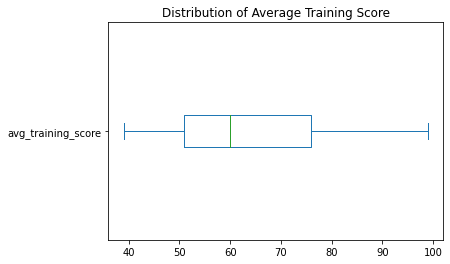

In [32]:
# box plot of avg_training_score
employee_data["avg_training_score"].plot.box(vert=False, title="Distribution of Average Training Score");

The column does not have any outlier as evident from the box-plot.

### Column 'is_promoted'

In [33]:
# summarize is_promoted column
employee_data["is_promoted"].describe()

count    54808.000000
mean         0.085170
std          0.279137
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: is_promoted, dtype: float64

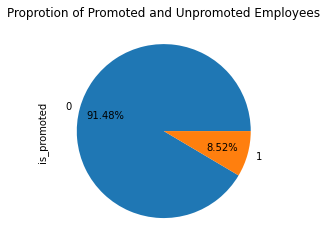

In [34]:
# distribution of the 'is_promoted' column values
is_promoted_distribution = employee_data["is_promoted"].value_counts()
is_promoted_distribution

# make a pie chart
is_promoted_distribution.plot.pie(autopct='%1.2f%%', pctdistance=0.7, radius=1, title="Proprotion of Promoted and Unpromoted Employees");

It can be observed that approximately companywide 9% of employees have been promoted.

### 3.1.3 Bivariate EDA

In [35]:
# import partially cleaned data
# comment the following line if you want to use your cleaned version
employee_data = pd.read_csv("employee_data_partially_cleaned.csv")

### Correlation among numeric data

In [36]:
employee_data.columns

Index(['employee_id', 'region', 'education', 'gender', 'age', 'department',
       'recruitment_channel', 'no_of_trainings', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score',
       'is_promoted'],
      dtype='object')

In [37]:
# correlation heatmap
numeric_data = employee_data[["age", "no_of_trainings", "previous_year_rating", 
                              "length_of_service", "avg_training_score"]]

numeric_data.corr().style.background_gradient(cmap='YlOrRd')

,age,no_of_trainings,previous_year_rating,length_of_service,avg_training_score
age,1.000000,-0.081283,0.005927,0.657093,-0.048389
no_of_trainings,-0.081283,1.000000,-0.063224,-0.057275,0.042517
previous_year_rating,0.005927,-0.063224,1.000000,0.000189,0.075189
length_of_service,0.657093,-0.057275,0.000189,1.000000,-0.038122
avg_training_score,-0.048389,0.042517,0.075189,-0.038122,1.000000


It can be observed that there is a strong positive correlation between age and length_of_service. In other words, higher age indicates higher work experience, which is not informative for our analysis. 

### Age and Promotion

In [39]:
# !pip install seaborn
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 63.8 MB/s eta 0:00:00
--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/rich/console.py", line 1752, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/rich/console.py", line 1390, in render
    for render_output in iter_render:
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/rich/segment.py", line 245, in split_lines
    for segment in segments:
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/rich

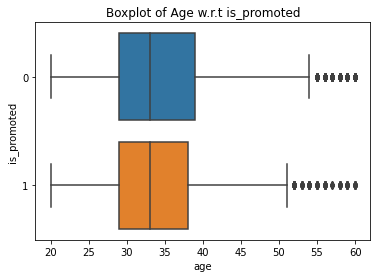

In [40]:
# boxplot of age against is_promoted
#employee_data[["age", "is_promoted"]].boxplot(by="is_promoted", vert=True, figsize=(6,5), grid=False);
sns.boxplot(data=employee_data, x="age", y="is_promoted", orient="h")
plt.title("Boxplot of Age w.r.t is_promoted");

It can be observed that the age distribution for promoted and non-promoted is similar. So age is not an distingushing factor for promotion.

### Number of Trainings and Promotion

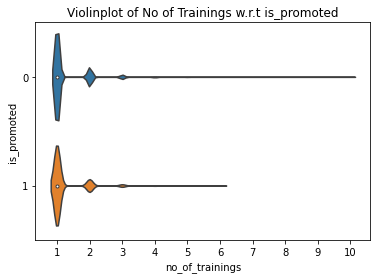

In [41]:
# boxplot of age against is_promoted
#df = employee_data.astype({"no_of_trainings":"category"})
sns.violinplot(data=employee_data, x="no_of_trainings", y="is_promoted", orient="h");
plt.title("Violinplot of No of Trainings w.r.t is_promoted")
plt.xticks(np.arange(1,11));

Violin plot plays similar role to box plot, except that violin plot shows density estimation for the underlying distribution rather actual corresponding to actual data points as in box plot.

Prior to seeing this plot, you might hypothesize that large number of trainings might be useful for promotion. However, it is evident from the plot that promoted employees have actually less training than those not promoted.

#### Read more about violin plots

<a href="https://towardsdatascience.com/violin-plots-explained-fb1d115e023d">Towards Data Science Article - Violin Plots Explained </a>


### Previous Year Rating and Promotion

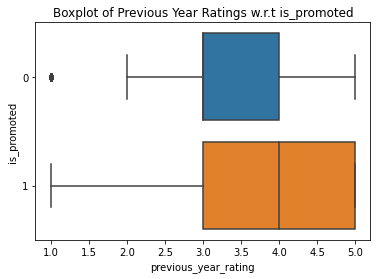

In [42]:
sns.boxplot(data=employee_data, x="previous_year_rating", y="is_promoted", orient="h")
plt.title("Boxplot of Previous Year Ratings w.r.t is_promoted");

The plot indicates that promoted employees have higher median previous_year_rating than non promoted. So previous_year_rating can be distinguishing feature for promotion, which is also evident from the following point plot.

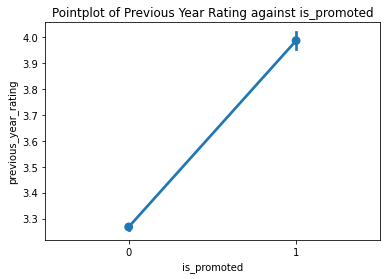

In [43]:
sns.pointplot(data=employee_data, y="previous_year_rating", x="is_promoted", orient="v")
plt.title("Pointplot of Previous Year Rating against is_promoted");

### Length of Service and Promotion

|Exercise|
|:---:|
|Using appropriate plot between length_of_service and is_promoted, comment whether length_of_service can be informative feature for promotion.|


In [170]:
# write your code here


### Average Training Score and Promotion

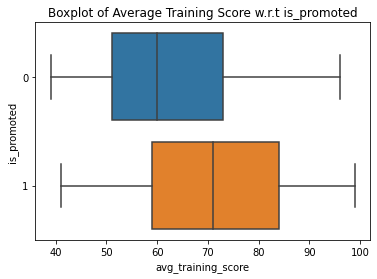

In [44]:
sns.boxplot(data=employee_data, x="avg_training_score", y="is_promoted", orient="h")
plt.title("Boxplot of Average Training Score w.r.t is_promoted");

From the box plot, it can be observed that higher training score is needed for promotion, which is also apparent from the following point plot.

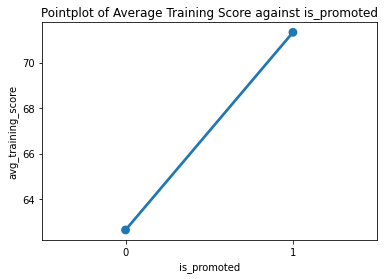

In [45]:
sns.pointplot(data=employee_data, y="avg_training_score", x="is_promoted", ci=False)
plt.title("Pointplot of Average Training Score against is_promoted");

## 3.2 Data Enrichment

Missing values are a common data quality problem. It could arise due to human error, sensors fail to transmit data, etc. As discussed earlier, one of the ways to handle missing values is to impute them using best estimate (guess) based on non-missing values. You'll learn to impute missing values using different methods.

Since you also converted out of bound values to missing values during EDA, the count of missing values is now different.

In [46]:
# Identify number of missing values in the dataset
employee_data.isna().sum()

employee_id                0
region                     0
education               2409
gender                     0
age                       10
department                 0
recruitment_channel        0
no_of_trainings            0
previous_year_rating    4138
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

It can be observaed that columns `education` and `previous_year_rating` have some missing values. You can impute them using any of mean, median, mode, random, or regression imputation. Let's impute previous year rating using random imputation.

**Random Imputation**

In [47]:
# set random seed for reproducibility of the results
# you can choose any number instead of 15
np.random.seed(15)

# extract non-missing values from the ratings column
non_missing_ratings = employee_data.loc[employee_data["previous_year_rating"].notna(), "previous_year_rating"]

# extract indices of missing rows from the ratings column
missing_ratings_indices = employee_data.loc[employee_data["previous_year_rating"].isna(), "previous_year_rating"].index

# impute missing values
employee_data.loc[missing_ratings_indices, "previous_year_rating"] = np.random.choice(a=non_missing_ratings, 
                                                                                      size=missing_ratings_indices.size)

# verify that there no missing values in the column
employee_data["previous_year_rating"].isna().sum()

0

**Mean Imputation**

Let's impute `age` using mena imputation. Here you'll first calculate mean of the non-missing values, round it to nearest integer, and then fill missing values with the mean.

In [48]:
# mean of non-missing age values
non_missing_age_mean = np.round(employee_data[employee_data.notna()]["age"].mean())

# fill missing age values with the above mean
employee_data["age"].fillna(non_missing_age_mean, inplace=True)

In [49]:
# verify that missing values are imputed in age
employee_data.isna().sum()

employee_id                0
region                     0
education               2409
gender                     0
age                        0
department                 0
recruitment_channel        0
no_of_trainings            0
previous_year_rating       0
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

|Exercise|
|:---:|
|Now it's your turn to handle missing values in the remaining column(s).|


In [178]:
# write your code here



In [50]:
# verify that missing values are imputed in the data
employee_data.isna().sum()

employee_id                0
region                     0
education               2409
gender                     0
age                        0
department                 0
recruitment_channel        0
no_of_trainings            0
previous_year_rating       0
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

## 3.3 Clustering

Clustering is an approach to create groups among data based on some similarity measure. K-Means is a popular clustering algorithm. Once you define how many clusters(groups) you need, the algorithm tries to minimize the distance of the points in a cluster with their center (mean). The following figure illustrates what clustering does.

![Clustering illustration](Clustering.png)
<i><center><font size=2> Figure 2. Clustering Illustration </font></center></i>

### 3.3.1 Implement K-Means

In [51]:
# comment the following line if you want to use your cleaned version
employee_data = pd.read_csv("employee_data_cleaned.csv")

# subset data for promoted employees and extract "age", and "avg_training_score" columns
data_to_cluster = employee_data.loc[employee_data["is_promoted"] == 1, ["age", "avg_training_score"]]

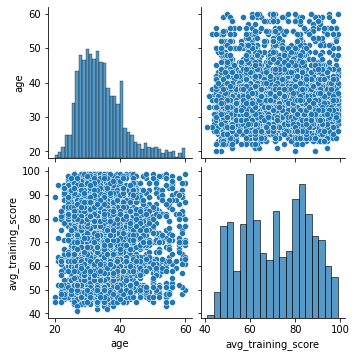

In [52]:
# visualize relationship between columns
sns.pairplot(data_to_cluster);

It can be observed that there are no visible clusters in the data. So K-Means might not work but let's try it.

In [53]:
#!pip install sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import minmax_scale

In [54]:
# scale the data using minmax scale
scaled_data = minmax_scale(data_to_cluster)

# initialize KMeans object with number of desired clusters
k_means = KMeans(n_clusters=2)

# fit and transform k_means object to scaled data
k_means.fit_transform(scaled_data)

# extract cluster labels
data_to_cluster["cluster_labels"] = k_means.labels_

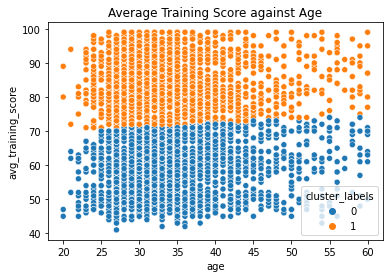

In [55]:
# plot the clusters
sns.scatterplot(data=data_to_cluster, x="age", y="avg_training_score", hue="cluster_labels")
plt.title("Average Training Score against Age");

It can be observed that the data have been clustered but the clusters are not meaningful.

## 3.4 Structured Data Analytics

### 3.4.1 Reshaping

Shape of the data indicates how the data is organized into rows and columns. Sometimes, data is more human readble format but not analytics friendly and vice versa. You'll learn two shapes of data and how to convert them from one to another.

### Wide Format

Data is called in wide format when each row contains measurement of different attributes of the same subject. The 'employee_data' is in the wide format as each row contains measurements of different employee attributes such as age, gender, education, avg_training_score, etc.

In [56]:
employee_data.head()

,employee_id,region,education,gender,age,department,recruitment_channel,no_of_trainings,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,E21133,region_13,Master's & above,M,36.0,Procurement,other,1,1.0,5,0,73,0
1,E39322,region_31,Bachelor's,M,37.0,Sales & Marketing,sourcing,2,2.0,2,0,48,0
2,E26399,region_7,Bachelor's,M,30.0,Technology,other,3,4.0,3,0,75,0
3,E18243,region_2,Bachelor's,M,43.0,Operations,other,1,5.0,5,0,58,0
4,E35678,region_26,Master's & above,M,45.0,Procurement,sourcing,2,3.0,19,0,68,0


Wide format is more human readble the long format. So while reporting, wide format is used. And it is useful for simple statistics and imputation.

### Long Format

Data is called in long format when each row contains measurement of exactly one attribute. For example, following data is in long format.

|employee_id|employee_attribute|value|
|---|---|---|
|E21133|region|region_13|
|E21133|education|Master's and above|
|E21133|gender|M|
|...|...|...|


Data in long format is considered as a 'tidy' data. Read more tidy data <a href="https://vita.had.co.nz/papers/tidy-data.pdf">here</a>. Long format is more analytics friendly and certain programming languages require data in long format.

### Convert Wide Data to Long Format

Let's take a subset of data that only includes gender and region of first 10 employees.

In [57]:
employee_gender_region = employee_data.loc[:9, ["employee_id", "gender", "region"]]
employee_gender_region

,employee_id,gender,region
0,E21133,M,region_13
1,E39322,M,region_31
2,E26399,M,region_7
3,E18243,M,region_2
4,E35678,M,region_26
5,E67404,M,region_23
6,E67240,M,region_23
7,E13711,M,region_15
8,E7277,M,region_27
9,E65150,F,region_2


In [58]:
# convert employee_data_subset to long format
melted_data = employee_gender_region.melt(id_vars="employee_id", value_vars=["gender", "region"],
                                         var_name="employee_attributes", value_name="value")

melted_data

,employee_id,employee_attributes,value
0,E21133,gender,M
1,E39322,gender,M
2,E26399,gender,M
3,E18243,gender,M
4,E35678,gender,M
5,E67404,gender,M
6,E67240,gender,M
7,E13711,gender,M
8,E7277,gender,M
9,E65150,gender,F


### Convert Long Data to Wide Format

In [59]:
# convert melted_data to wide format
pivoted_data = melted_data.pivot(index="employee_id", columns="employee_attributes", values="value")
                                                       
pivoted_data

employee_attributes,gender,region
employee_id,,
E13711,M,region_15
E18243,M,region_2
E21133,M,region_13
E26399,M,region_7
E35678,M,region_26
E39322,M,region_31
E65150,F,region_2
E67240,M,region_23
E67404,M,region_23


Though the data doesn't look as expected. Following code will make it look more familiar.

In [60]:
# remove name 'employee_attributes'
pivoted_data.columns.name = None

# change index column to numbers from existing index column 'employee_id'
pivoted_data = pivoted_data.reset_index()

pivoted_data

,employee_id,gender,region
0,E13711,M,region_15
1,E18243,M,region_2
2,E21133,M,region_13
3,E26399,M,region_7
4,E35678,M,region_26
5,E39322,M,region_31
6,E65150,F,region_2
7,E67240,M,region_23
8,E67404,M,region_23
9,E7277,M,region_27


# 4. Data Analysis

In the last section, you learnt to reshape data. In this section, you'll learn important techniques such as group_by, pivot_table, etc. to aggregate and summarize data which can reveal useful insights. You'll continue with the wide shape of the employee_data.

#### Question : How many employees have been promoted in the organization?

In [61]:
promotion_count = employee_data.groupby("is_promoted")["is_promoted"].count()
promotion_count

is_promoted
0    50140
1     4668
Name: is_promoted, dtype: int64

It can be observed that 4668 employees are promoted and 50140 employees are not yet promoted.

#### Question : What's the overall promotion rate across the organization?

In [62]:
# set precision
pd.set_option("display.precision", 2)

promotion_percentage = employee_data.groupby("is_promoted")["is_promoted"].count() * 100 / employee_data.shape[0]
promotion_percentage

is_promoted
0    91.48
1     8.52
Name: is_promoted, dtype: float64

It can be observed that about 8.52% employees have been promoted out of total employees.

In [63]:
# define promotion rate
promotion_rate = 0.0852

#### Question : Identify departments with above average promotion rate.

In [64]:
department_wise_promotion_rate = employee_data.groupby("department")["is_promoted"].mean()
department_wise_promotion_rate

department
Analytics            0.10
Finance              0.08
HR                   0.06
Legal                0.05
Operations           0.09
Procurement          0.10
R&D                  0.07
Sales & Marketing    0.07
Technology           0.11
Name: is_promoted, dtype: float64

In [65]:
# deaprtment with above average promotion
department_wise_promotion_rate[department_wise_promotion_rate > promotion_rate]

department
Analytics      0.10
Operations     0.09
Procurement    0.10
Technology     0.11
Name: is_promoted, dtype: float64

It can be observed that 'Analytics', 'Operations', 'Procurement', and 'Technology' departments have higher promotion rate than organizational average.

#### Question : Identify which gender has above average promotion rate.

|Exercise|
|:---:|
|Identify which gender has above average promotion rate.|


In [197]:
# write your code here



#### Question : Identify education wise promotion rate in departments.

In [66]:
# multiply by 100 to get percentage
employee_data.groupby(["department", "education"])["is_promoted"].mean() * 100

department         education       
Analytics          Bachelor's           9.30
                   Below Secondary     20.00
                   Master's & above    10.50
Finance            Bachelor's           8.16
                   Below Secondary      5.66
                   Master's & above     8.48
HR                 Bachelor's           4.72
                   Below Secondary      7.03
                   Master's & above     7.28
Legal              Bachelor's           5.28
                   Below Secondary      6.15
                   Master's & above     3.77
Operations         Bachelor's           8.21
                   Below Secondary      6.15
                   Master's & above    11.15
Procurement        Bachelor's           8.75
                   Below Secondary      4.62
                   Master's & above    11.44
R&D                Bachelor's           6.80
                   Below Secondary      0.00
                   Master's & above     7.06
Sales & Marketing  

However, above result is hard to read. Let's make pivot table which is readable.

In [67]:
# multiply by 100 to get percentage
education_department_promotion = employee_data.pivot_table(index="department", columns="education" ,values="is_promoted", aggfunc="mean")*100
education_department_promotion

education,Bachelor's,Below Secondary,Master's & above
department,,,
Analytics,9.30,20.00,10.50
Finance,8.16,5.66,8.48
HR,4.72,7.03,7.28
Legal,5.28,6.15,3.77
Operations,8.21,6.15,11.15
Procurement,8.75,4.62,11.44
R&D,6.80,0.00,7.06
Sales & Marketing,7.02,4.00,7.71
Technology,10.67,15.42,10.53


Interestingly, employees with education level below secondary are more promoted than others in Analytics, Legal, and Technology.

#### Question : Identify gender wise promotion rate in departments. 

|Exercise|
|:---:|
|Identify gender wise promotion rate in departments. And comment your insights.|


In [200]:
# write your code here




# 5. Storytelling with Data

In the storytelling part, you will communicate your insights pertaining to data using visualizations. You can use different methods for storytelling such as drill-down, contrast, etc. Read more about the storytelling methods <a href="https://help.tableau.com/current/pro/desktop/en-us/story_best_practices.htm">here</a>.

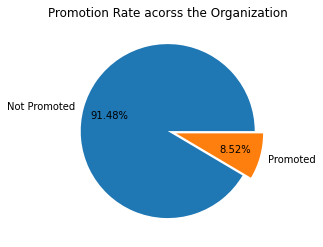

In [68]:
ax1 = is_promoted_distribution.plot.pie(autopct='%1.2f%%', pctdistance=0.7, radius=1,
                                       labels=["Not Promoted", "Promoted"], explode=[0, 0.1])
ax1.set_title("Promotion Rate acorss the Organization")
ax1.axis('off');

In the organization, about 9% of employees have been promoted. Let's find out which department(s) have promotion rate above this rate.

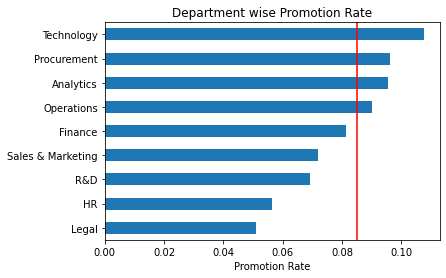

In [69]:
ax2 = department_wise_promotion_rate.sort_values().plot(kind="barh")
ax2.axvline(promotion_rate, c="red", label="Oraganization Promotion Rate")
ax2.yaxis.label.set_visible(False)
ax2.set_xlabel("Promotion Rate")
ax2.set_title("Department wise Promotion Rate");

Four departments 'Analytics', 'Operations', 'Procurement', and 'Technology' departments have higher promotion rate than organizational average.

|Exercise|
|:---:|
|Make plot of gender wise promotion and comment your observation.|


In [203]:
# write your code here




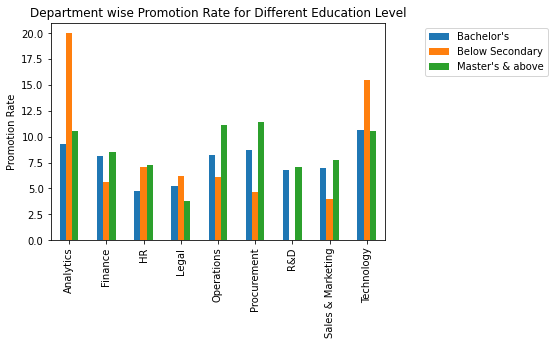

In [70]:
ax3 = education_department_promotion.sort_values(by="department").plot(kind="bar")
ax3.legend(bbox_to_anchor=(1.5, 1))
ax3.set_ylabel("Promotion Rate")
ax3.xaxis.label.set_visible(False)
ax3.set_title("Department wise Promotion Rate for Different Education Level");

|Exercise|
|:---:|
|Comment your observation from the above plot.|


In [1]:
# write your obervation


Furthermore, it would be curious to see if promoted employees have higher previous ratings than other employees.

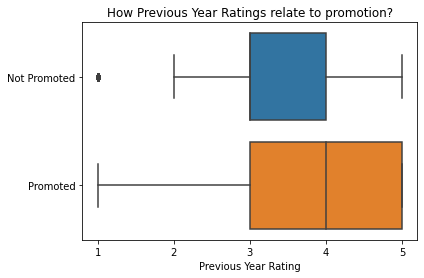

In [71]:
sns.boxplot(data=employee_data, x="previous_year_rating", y="is_promoted", orient="h")
plt.yticks(ticks=[0, 1], labels=["Not Promoted", "Promoted"])
plt.xlabel("Previous Year Rating")
plt.ylabel("")
plt.xticks(np.arange(1,6))
plt.title("How Previous Year Ratings relate to promotion?");

Storytelling can be continued further with insights from other columns such as 'avg_training_score', etc. using appropriate visualizations.